In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-dataset


In [21]:
data = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
num_unique = len(data['id'].unique())
print(num_unique)

569


In [23]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [24]:
X= data.drop(['diagnosis','id'],axis=1)
y= data['diagnosis']

In [25]:
sc = StandardScaler()
X_Scaled = sc.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.3, random_state=42)

In [27]:
svm_linear = SVC(kernel='linear',class_weight='balanced', C=1)
svm_rbf = SVC(kernel='rbf', class_weight= 'balanced', C=1, gamma='scale')

In [28]:
svm_linear.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', kernel='linear')

In [29]:
svm_rbf.fit(X_train, y_train)

SVC(C=1, class_weight='balanced')

In [49]:
def plot_decision_boundary(clf, X, y, title):
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    h = 2
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    original_grid = pca.inverse_transform(grid)

    Z = clf.predict(original_grid)
    Z = np.where(Z == 'M', 1, 0)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    y_numeric = np.where(y == 'M', 1, 0)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric, cmap=plt.cm.coolwarm, edgecolors='k')

    plt.title(title)
    plt.show()

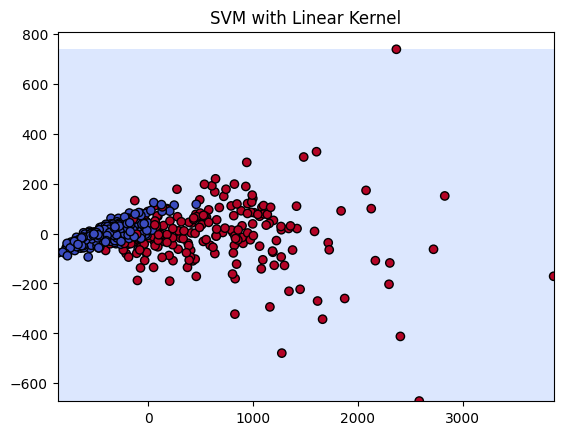

In [50]:
plot_decision_boundary(svm_linear, X, y, "SVM with Linear Kernel")

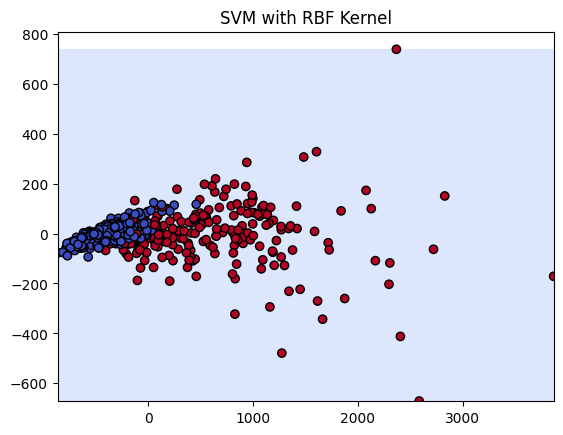

In [55]:
plot_decision_boundary(svm_rbf, X, y, "SVM with RBF Kernel")

In [57]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best parameters: {'C': 100, 'gamma': 'scale'}
Best CV accuracy: 0.9673417721518988


Test accuracy with best model: 0.9532163742690059


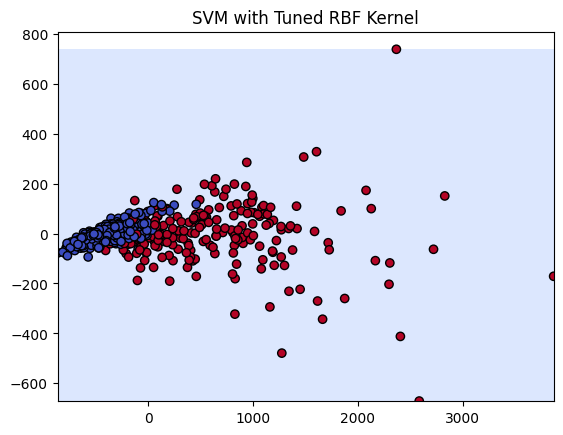

In [56]:
best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy with best model:", test_accuracy)

plot_decision_boundary(best_model, X, y, "SVM with Tuned RBF Kernel")


In [54]:
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.89473684 0.93859649 0.92982456 0.94736842 0.94690265]
Mean CV score: 0.9314857941313461
